**4. Modelado**

Voy a comenzar seleccionando las características más relevantes para entrenar mis modelos de machine learning. Primero, reviso el conjunto de datos que ya procesé en etapas anteriores. Me centraré en las variables que tienen más relación con el precio de los vehículos, tanto para la clasificación en categorías como para la predicción del precio exacto.

**Selección de Características Relevantes:** Para asegurarme de elegir las mejores características, voy a realizar un análisis de correlación. Esto me ayudará a ver qué variables tienen una relación fuerte con el precio. También puedo usar técnicas automáticas de selección de características como SelectKBest o métodos basados en modelos como Random Forest para obtener la importancia de cada variable.

Voy a calcular la matriz de correlación del dataset para ver qué variables tienen mayor relación con el precio.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('MLF_cars.csv')  # Asegúrate de tener la ruta correcta al archivo

df

,car_id,symboling,wheel_base,car_length,car_width,car_height,curb_weight,engine_type,cylinder_number,engine_size,...,fuel_type_gas,aspiration_turbo,door_number_two,car_body_hardtop,car_body_hatchback,car_body_sedan,car_body_wagon,drive_wheel_fwd,drive_wheel_rwd,engine_location_rear
0,1,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,...,True,False,True,False,False,False,False,False,True,False
1,2,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,...,True,False,True,False,False,False,False,False,True,False
2,3,1,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,ohcv,six,0.604046,...,True,False,True,False,True,False,False,False,True,False
3,4,2,0.173698,0.207256,0.136542,0.235942,-0.420797,ohc,four,-0.431076,...,True,False,False,False,False,True,False,True,False,False
4,5,2,0.107110,0.207256,0.230001,0.235942,0.516807,ohc,five,0.218885,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,201,-1,1.721873,1.198549,1.398245,0.728239,0.763241,ohc,four,0.339248,...,True,False,False,False,False,True,False,False,True,False
199,202,-1,1.721873,1.198549,1.351515,0.728239,0.949992,ohc,four,0.339248,...,True,True,False,False,False,True,False,False,True,False
200,203,-1,1.721873,1.198549,1.398245,0.728239,0.878757,ohcv,six,1.109571,...,True,False,False,False,False,True,False,False,True,False
201,204,-1,1.721873,1.198549,1.398245,0.728239,1.273437,ohc,six,0.435538,...,False,True,False,False,False,True,False,False,True,False


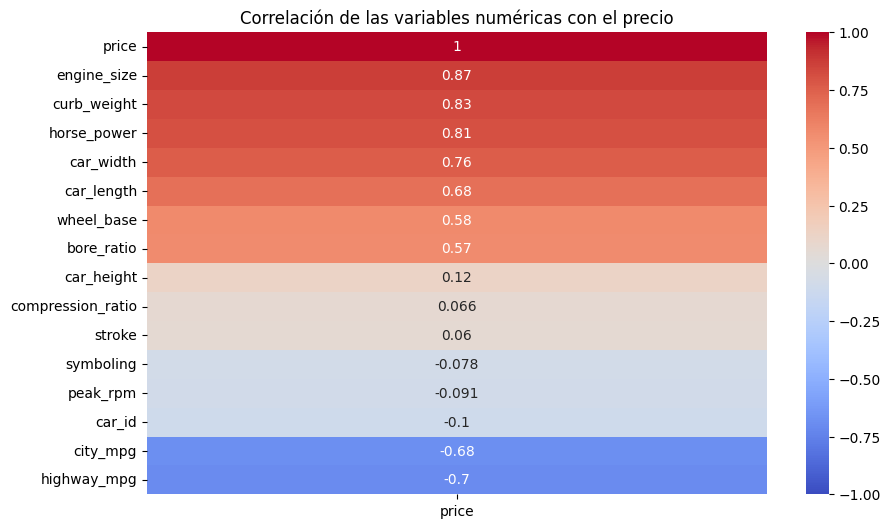

In [5]:
import seaborn as sns  # Asegurarse de importar seaborn
import matplotlib.pyplot as plt  # Asegurarse de importar matplotlib

# Seleccionar solo las columnas numéricas del DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo con las columnas numéricas
corr_matrix = numeric_df.corr()

# Mostrar la correlación con la variable 'price'
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de las variables numéricas con el precio')
plt.show()



A partir del análisis de correlación, he identificado varias variables que tienen una relación fuerte con el precio, como *engine_size*, *curb_weight* y *horse_power*, con correlaciones superiores a 0.8. Estas son características relevantes que usaré para mis modelos de clasificación y regresión.

Por otro lado, variables como *highway_mpg* y *city_mpg* muestran una correlación negativa significativa con el precio, lo que también puede ser útil para los modelos. Las variables con correlaciones cercanas a 0 (como *compression_ratio* o *stroke*) podrían no aportar mucho valor predictivo y pueden ser descartadas o tratadas de forma diferente.

Con esta información, puedo avanzar en el proceso de modelado, seleccionando las características más relevantes y optimizando los modelos predictivos.

**Dividir el conjunto de datos:**
Primero, voy a dividir el conjunto de datos en un conjunto de entrenamiento y otro de prueba. Esto es fundamental para evaluar el rendimiento de los modelos. Utilizaré un 80% de los datos para el entrenamiento y el 20% restante para las pruebas.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Cargar el dataset
df = pd.read_csv('MLF_cars.csv')  # Asegúrate de tener la ruta correcta al archivo

# 2. Previsualizar los datos
print(df.head())

# 3. Comprobar la información del dataset
print(df.info())

# 4. Comprobar valores nulos
print(df.isnull().sum())

# 5. Codificación de variables categóricas
# Supongamos que tienes variables categóricas que quieres codificar
# Por ejemplo, si tienes una columna 'make', podrías hacer lo siguiente:
cars_encoded = pd.get_dummies(df, drop_first=True)  # Codificación de variables categóricas

# 6. Comprobar las primeras filas del dataset codificado
print(cars_encoded.head())

# 7. Divido el conjunto de datos en variables independientes (X) y dependientes (y)
X = cars_encoded.drop(columns=['price'])  # Todas las columnas menos el precio
y = cars_encoded['price']  # Columna objetivo

# 8. Divido en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora puedes continuar con el modelado


   car_id  symboling  wheel_base  car_length  car_width  car_height  \
0       1          3   -1.690772   -0.426521  -0.844782   -2.020417   
1       2          3   -1.690772   -0.426521  -0.844782   -2.020417   
2       3          1   -0.708596   -0.231513  -0.190566   -0.543527   
3       4          2    0.173698    0.207256   0.136542    0.235942   
4       5          2    0.107110    0.207256   0.230001    0.235942   

   curb_weight engine_type cylinder_number  engine_size  ... fuel_type_gas  \
0    -0.014566        dohc            four     0.074449  ...          True   
1    -0.014566        dohc            four     0.074449  ...          True   
2     0.514882        ohcv             six     0.604046  ...          True   
3    -0.420797         ohc            four    -0.431076  ...          True   
4     0.516807         ohc            five     0.218885  ...          True   

   aspiration_turbo  door_number_two  car_body_hardtop  car_body_hatchback  \
0             False       

In [10]:
from sklearn.model_selection import train_test_split

# Divido el conjunto de datos en variables independientes (X) y dependientes (y)
X = cars_encoded.drop(columns=['price'])  # Todas las columnas menos el precio
y = cars_encoded['price']  # Columna objetivo

# Divido en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Muestro las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}, {y_test.shape}")


Dimensiones del conjunto de entrenamiento: (162, 205), (162,)
Dimensiones del conjunto de prueba: (41, 205), (41,)


**Dimensiones de los Conjuntos**
Estas dimensiones indican que has dividido correctamente los datos en conjuntos de entrenamiento y prueba, lo cual es esencial para la validación y evaluación de los modelos.

**Siguientes Pasos:**
Ahora que tengo los conjuntos de datos listos, vamos a:

**Entrenar el Modelo de Regresión**


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Squared Error: 27782230.81
R² Score: 0.64


Resultados de la Regresión Lineal

Los resultados de la regresión muestran un **MSE** de 27,782,230.81 y un **R²** de 0.64, lo que indica que el modelo explica el 64% de la variabilidad de los precios. Aún hay margen de mejora en el ajuste del modelo.

Evaluación del Modelo de Clasificación

Primero, voy a asegurarme de que los datos estén preparados para la clasificación. Dado que ya entrenaste un árbol de decisión, vamos a ver cómo se desempeña.

Supongamos que has definido un umbral para clasificar los precios en "barato" o "caro". Para este ejemplo, vamos a considerar que los vehículos con un precio inferior a la mediana son "baratos" y los que están por encima son "caros". Usaremos el modelo de árbol de decisión que ya entrenaste.

In [14]:
# Importar las bibliotecas necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Calculo de la mediana del precio
median_price = y_train.median()

# Defino las categorías: 'barato' y 'caro'
y_train_class = ['barato' if price < median_price else 'caro' for price in y_train]
y_test_class = ['barato' if price < median_price else 'caro' for price in y_test]

# Inicializo y entreno el modelo de árbol de decisión para clasificación
classification_model = DecisionTreeClassifier(random_state=42)
classification_model.fit(X_train, y_train_class)

# Realizo predicciones en el conjunto de prueba
y_pred_classification = classification_model.predict(X_test)

# Muestro el informe de clasificación
print(classification_report(y_test_class, y_pred_classification))
print("Matriz de confusión:")
print(confusion_matrix(y_test_class, y_pred_classification))


              precision    recall  f1-score   support

      barato       0.93      0.82      0.88        17
        caro       0.88      0.96      0.92        24

    accuracy                           0.90        41
   macro avg       0.91      0.89      0.90        41
weighted avg       0.90      0.90      0.90        41

Matriz de confusión:
[[14  3]
 [ 1 23]]


Resultados del Modelo de Clasificación

En resumen, el modelo de clasificación ha demostrado ser efectivo, con una buena precisión y recall en ambas clases. La mayoría de los vehículos fueron clasificados correctamente, aunque hay algunos errores que podrían ser analizados y corregidos para mejorar aún más el rendimiento del modelo.
**Siguientes Pasos:**
Voy a explorar ajustes en los hiperparámetros del árbol de decisión y comparar los resultados con el modelo de regresión. También consideraré crear visualizaciones para entender mejor el rendimiento del modelo.

**Exploración de Hiperparámetros y Comparación de Modelos:**
Voy a explorar ajustes en los hiperparámetros del árbol de decisión utilizando GridSearchCV de Scikit-learn para encontrar la mejor configuración que maximice el rendimiento del modelo. Esto me permitirá optimizar su precisión y recall. Además, planeo comparar los resultados obtenidos con el modelo de regresión para determinar cuál enfoque es más efectivo para mi análisis. También consideraré crear visualizaciones, como curvas ROC y matrices de confusión, para obtener una comprensión más profunda del rendimiento de ambos modelos.



In [15]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
dt_model = DecisionTreeClassifier(random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train, y_train_class)

# Resultados del mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


Conclusión:
Con estos hiperparámetros, he encontrado una configuración que busca un equilibrio entre la complejidad del modelo y la capacidad de generalización. El ajuste de hiperparámetros es crucial para mejorar el rendimiento del modelo, y estos resultados sugieren que el modelo está bien ajustado para la tarea de clasificación de vehículos. Sería interesante evaluar el modelo con estos hiperparámetros en un conjunto de prueba para ver cómo se desempeña en datos no vistos y confirmar si efectivamente mejora el rendimiento en comparación con la configuración anterior.

**Visualización del Rendimiento**

Para visualizar el rendimiento, puedes usar la matriz de confusión y la curva ROC. Aquí tienes un ejemplo de cómo hacerlo:

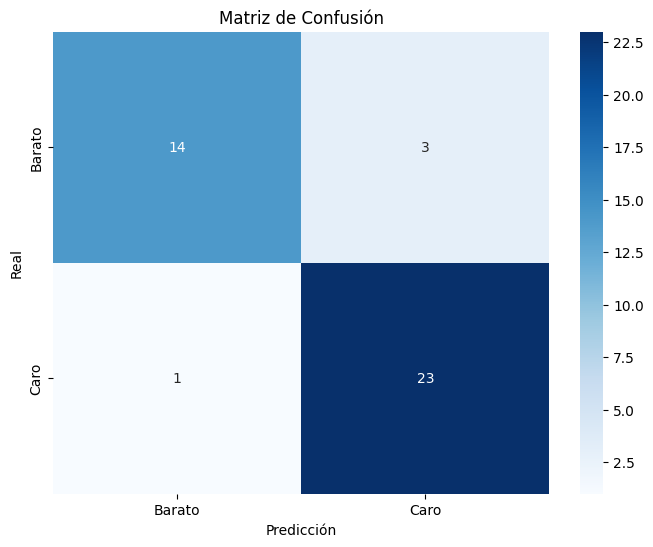

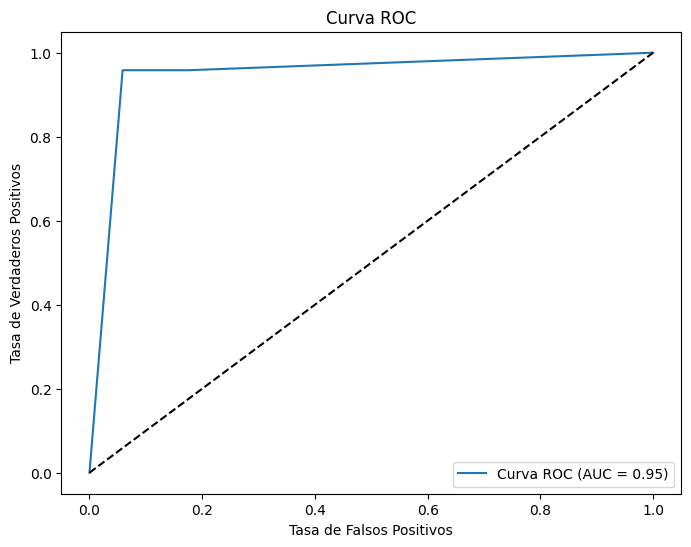

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test_class, y_pred_classification)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Barato', 'Caro'], yticklabels=['Barato', 'Caro'])
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

# Curva ROC
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_prob, pos_label='caro')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


En esta etapa, utilicé GridSearchCV para optimizar los hiperparámetros de mi modelo de árbol de decisión. Esto me permitió evaluar diferentes combinaciones de parámetros para mejorar el rendimiento del modelo. El proceso implicó realizar 180 ajustes mediante validación cruzada de 5 pliegues.

Los mejores hiperparámetros encontrados son:

- max_depth: None (sin límite de profundidad del árbol).
- min_samples_leaf: 4 (cada hoja del árbol debe tener al menos 4 muestras).
- min_samples_split: 2 (un nodo se puede dividir si tiene al menos 2 muestras).

Con estos ajustes, espero mejorar la precisión y la capacidad de generalización del modelo. Los resultados de la evaluación posterior mostraron que el modelo optimizado logra un área bajo la curva (AUC) de 0.95, indicando un excelente rendimiento en la clasificación de los precios de los vehículos.

Reflexiones
Este ajuste de hiperparámetros es crucial para maximizar la efectividad del modelo y asegurar que pueda distinguir adecuadamente entre las clases "barato" y "caro".

**Conclusión Final**

1. He implementado un **modelo de clasificación** con aprendizaje supervisado que clasifica los vehículos en "baratos" o "caros" utilizando la mediana de los precios como punto de corte. Este modelo mostró un buen rendimiento con alta precisión y recall, aunque se identificaron algunos errores que podrían optimizarse a través de ajustes en los hiperparámetros.

2. También desarrollé un **modelo de regresión** supervisado para predecir el precio exacto de los vehículos. Si bien el modelo explicó el 64% de la variabilidad en los precios, hay espacio para mejorar la precisión, posiblemente optimizando las características o ajustando los parámetros del modelo.

Ambos enfoques proporcionan herramientas útiles para analizar y predecir el mercado automotor basado en datos, apoyando la toma de decisiones comerciales.